# Graduate admissions predictions

**Description:**
The is section takes a look at the dataset for graduate admissions as sourced from kaggle.com, to identify the most prevalent features for predicting admission chances of a student to US graduate schools

### Importing data analysis packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### Loading the dataset

In [2]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

#### Let's take a look at the dataset

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
# Dataset statistics
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


The data doesn't seem to possess outliers from the statistics above

In [6]:
# More dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Column names have errors that can make our analysis more difficult, let's correct them. We can also take the unique candidates identifier: Serial No. as our index for the dataset.

In [8]:
data.rename(columns={'Serial No.': 'Serial No.', 'GRE Score':'GRE Score', 'TOEFL Score':'TOEFL Score', 
                     'University Rating':'University Rating', 'SOP':'SOP', 'LOR ':'LOR', 
                     'CGPA':'CGPA', 'Research':'Research', 'Chance of Admit ': 'Candidate_rating'},inplace = True)

In [9]:
data.set_index('Serial No.',inplace = True)

In [10]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Candidate_rating
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


#### CGPA records

In [11]:
# Minimum CGPA recorded on a 4.0 scale
data['CGPA'].min()*0.4

2.72

In [12]:
# Maximum CGPA recorded on a 4.0 scale
data['CGPA'].max()*0.4

3.968

In [13]:
# Average CGPA on a 4.0 scale
data['CGPA'].mean()*0.4

3.4305760000000016

CGPA records seem uniformly distributed ranging from 2.72 to 3.97 on a 4.0 scale common in the US.

#### SOP scoring

In [14]:
data['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

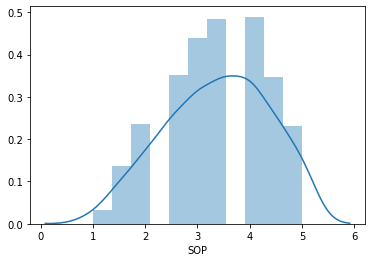

In [15]:
sns.distplot(data['SOP'])

Candidate Statement of Purpose essays are graded on a scale 

#### LOR scoring

In [16]:
data['LOR'].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

#### GRE scores

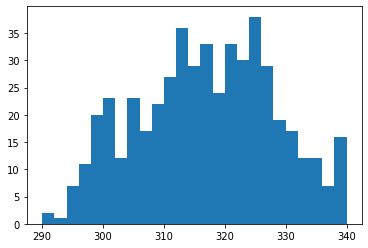

In [17]:
plt.hist(data['GRE Score'],bins=25)
plt.show()

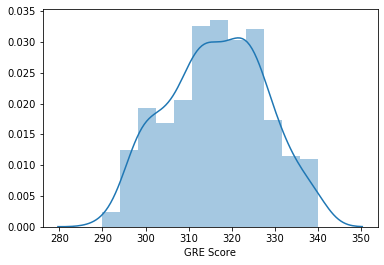

In [18]:
sns.distplot(data['GRE Score'])

#### TOEFL scores

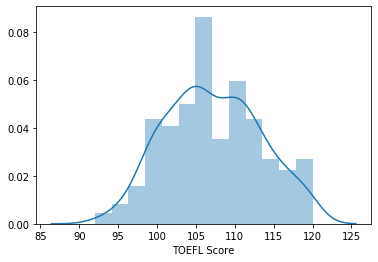

In [19]:
sns.distplot(data['TOEFL Score'])

#### University ratings

In [20]:
data['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

#### Data feature relationshps

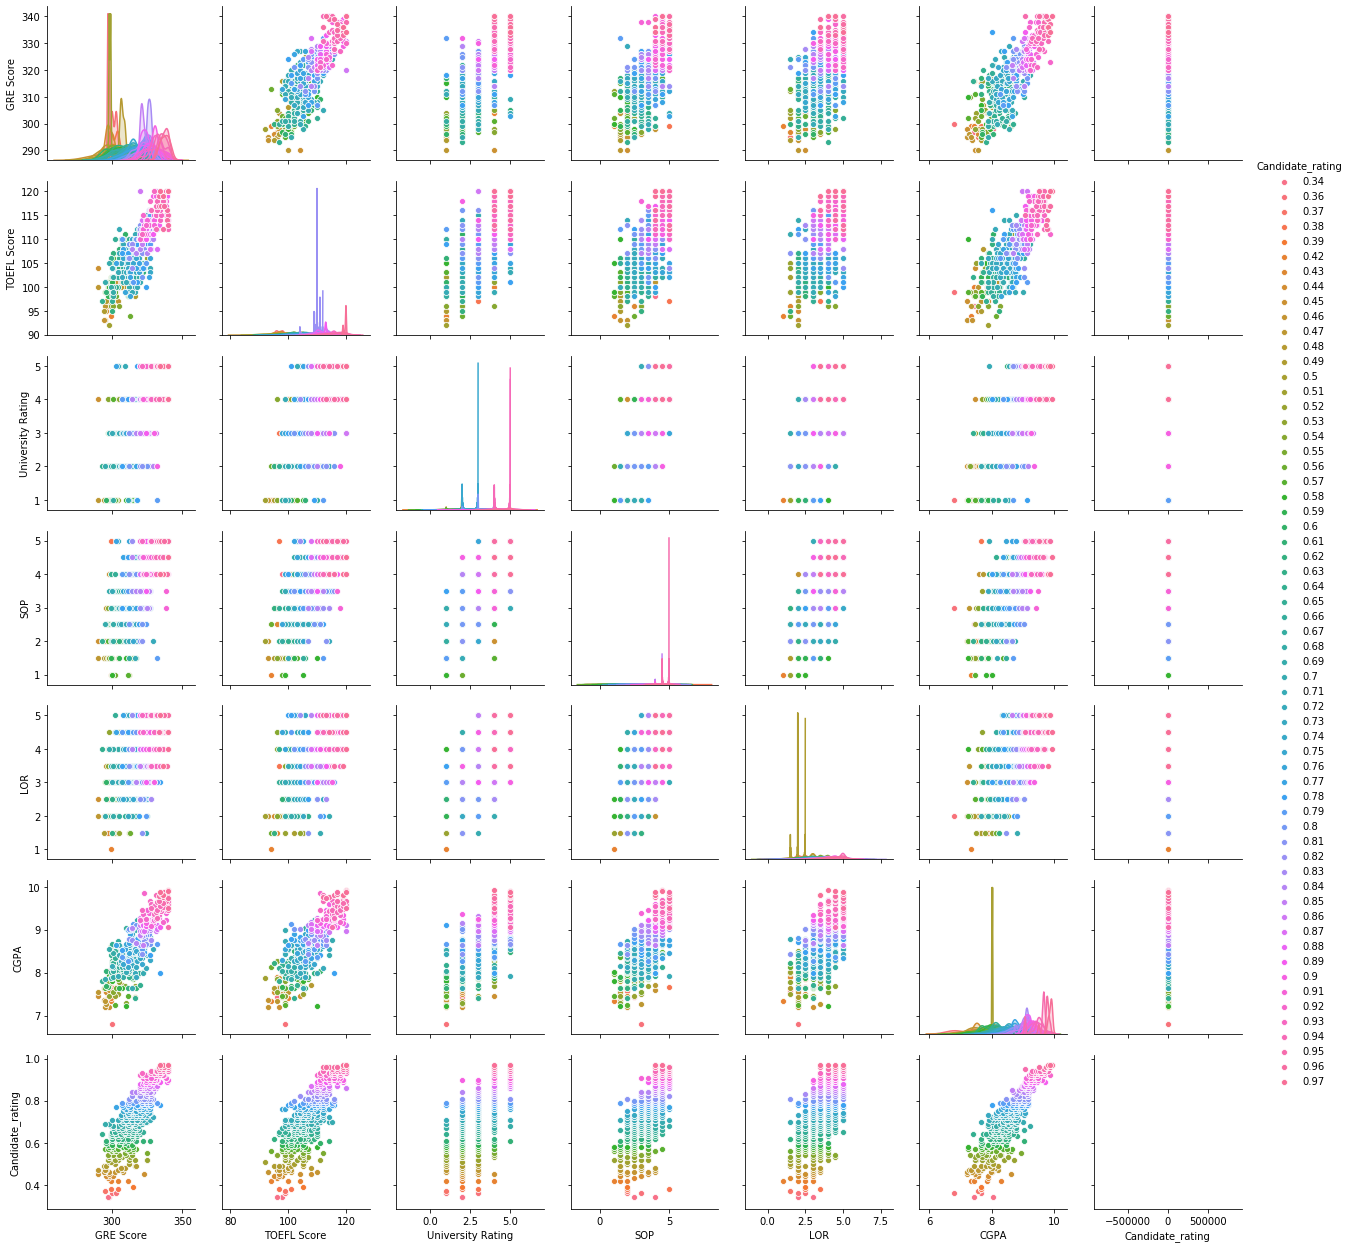

In [29]:
sns.pairplot(data[['GRE Score', 'TOEFL Score','University Rating','SOP','LOR','CGPA','Candidate_rating']], 
             hue='Candidate_rating')
#sns.pairplot(data)

The strongest correlations are observed between the `CGPA`, `TOEFL Score` and `CGPA`features with `Candidate_rating`

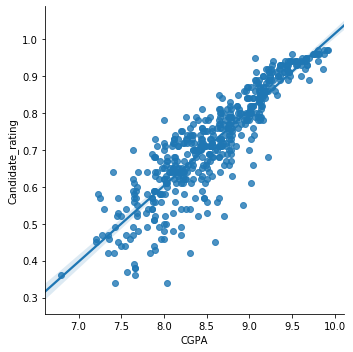

In [22]:
sns.lmplot(x='CGPA',y='Candidate_rating', data=data)

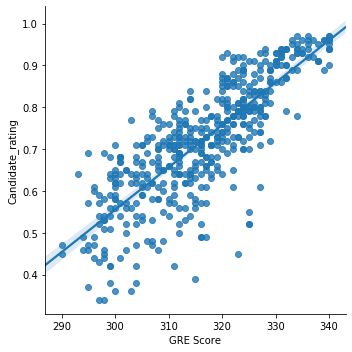

In [23]:
sns.lmplot(x='GRE Score',y='Candidate_rating', data=data)

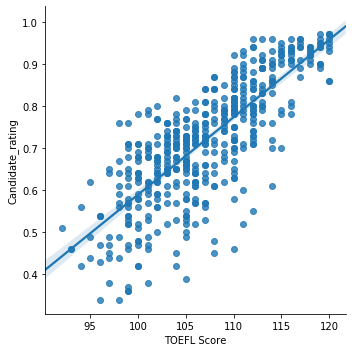

In [24]:
sns.lmplot(x='TOEFL Score',y='Candidate_rating', data=data)

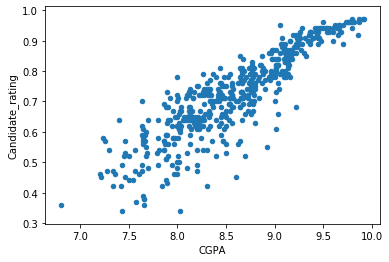

In [25]:
data.plot.scatter(x='CGPA',y='Candidate_rating')
plt.show()